# Applying Clustering Algorithms to Find Geographically Similar Headlines

### Objective

Cluster (find groups of) headlines based on the geographic coordinates using both k-means clustering and DBSCAN. Visualize the clusters on a world map to check the results. Try different parameters and distance measures in the algorithms to produce better clusters

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_json("data/chapter2-data.json")

In [2]:
#let's verify we have data
data.head()

,headline,cities,latitude,longitude,country_code
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US


Text(0.5, 1.0, 'example scatter of lat/long')

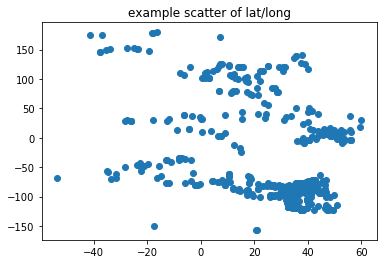

In [3]:
plt.scatter(data['latitude'], data['longitude'])
plt.title("example scatter of lat/long")

In [22]:
cities = list(zip(data["latitude"], data["longitude"]))
cluster_size=3
cluster_model = KMeans(n_clusters=cluster_size)
assigned_cities = cluster_model.fit_predict(cities)

print("City assignments:")
print(assigned_cities)

City assignments:
[0 0 0 2 0 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 2 1 0 0 2 0 1 1 2 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0 2 0 0 1 0 1 1 1 1 1 0 1 0 0 0
 2 1 0 0 0 0 0 1 0 0 2 1 0 0 1 0 1 0 1 1 2 1 0 1 2 0 1 0 1 0 0 1 2 1 0 0 0
 2 0 0 0 0 1 1 0 0 1 1 0 2 1 1 0 1 2 1 0 0 0 0 2 0 0 0 1 0 0 2 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 0 0 1 0 0 2 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 0
 0 0 0 1 0 2 0 2 0 2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 2
 2 0 0 0 2 0 0 2 0 2 0 0 0 2 2 2 2 0 2 0 0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 2 1
 0 1 0 0 0 2 0 1 2 1 1 0 2 1 1 1 0 2 0 0 0 0 2 0 1 0 1 0 0 0 2 2 0 2 2 0 0
 0 0 2 2 0 0 0 1 0 2 2 0 2 2 0 1 0 2 0 0 0 0 2 0 0 0 1 2 0 0 2 0 0 1 2 0 0
 0 0 0 0 2 0 0 0 0 0 2 0 0 1 0 0 2 1 0 0 2 0 0 0 0 0 2 0 1 0 2 0 0 0 0 0 1
 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 1 0 1 0 2 0 2 1 0 0
 0 0 2 2 2 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 1 0 2 0
 2 1 2 0 0 1 0 0 1 2 0 2 2 2 2 2 2 0 2 1 0 0 0 0 0 2 2 2 0 1 2 0 0 0 0 0 0
 0 0 2 

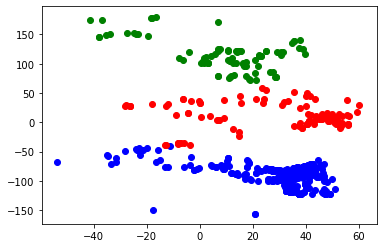

In [23]:
for cluster_index in range(cluster_size):
    selected_cities = [cities[i] for i in range(len(cities))
                      if cluster_index == assigned_cities[i]]
    x_coordinates, y_coordinates = np.array(selected_cities).T
    plt.scatter(x_coordinates, y_coordinates,
                color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'][cluster_index])
plt.show()

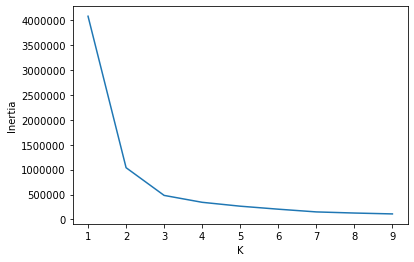

In [24]:
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(cities).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()